## Credit Card Fraud Detection

# Shraavan Sridhar

In [201]:
#importing the required libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore') # filtering warnigns

import seaborn as sns

from matplotlib import style 
plt.style.use('fivethirtyeight')

## Reading and Understanding the data

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [203]:
#df = pd.read_csv('creditcard.csv')
df=pd.read_csv('/content/drive/MyDrive/Capstone/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [204]:
#Checking shape of the data

df.shape

(284807, 31)

In [206]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- Accoridng to the above table, we have no missing values<br>
- All the columns here are PCA transformed except Amount column and the Class<br>

## EDA

Here we will observe the distribution of our classes

In [207]:
classes=df['Class'].value_counts()

In [208]:
print(classes)

0    284315
1       492
Name: Class, dtype: int64


Only 492 cases of fraud out of 284k transactions.

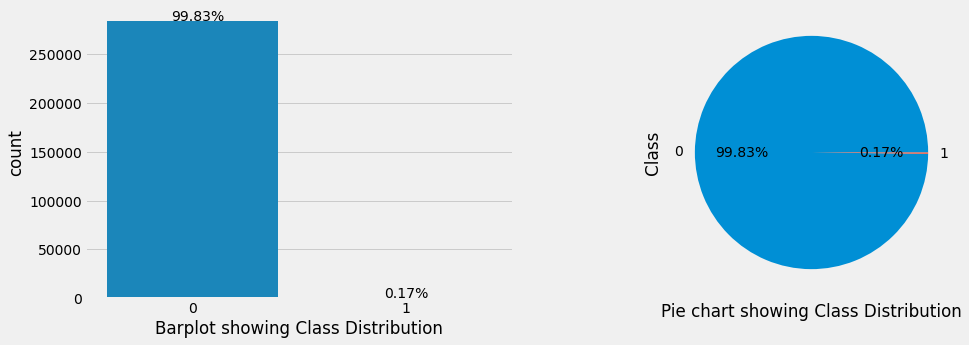

In [209]:
# Analysing the class variables using a bar plot and a pir chart.
plt.subplots(1,2,figsize=[15,5])
plt.subplot(1,2,1)
ax=sns.countplot(x=df['Class'])
plt.xlabel('Barplot showing Class Distribution')
for p in ax.patches:
    ax.annotate('{}%'.format(round(p.get_height()/len(df['Class'])*100,2)),(p.get_x()+0.3,p.get_height()+100))
plt.subplot(1,2,2)
classes.plot.pie(autopct='%0.2f%%')
plt.xlabel('Pie chart showing Class Distribution')
plt.show()

Class imbalance is significant with only 0.17% Fraud.

In [210]:
# Adding an addtional column to convert time in sec to time in hours. 
df['Time_h']=df['Time']/3600

In [211]:
#removing the original time Column.

df=df.drop(columns=['Time'])

In [212]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Time_h'],
      dtype='object')

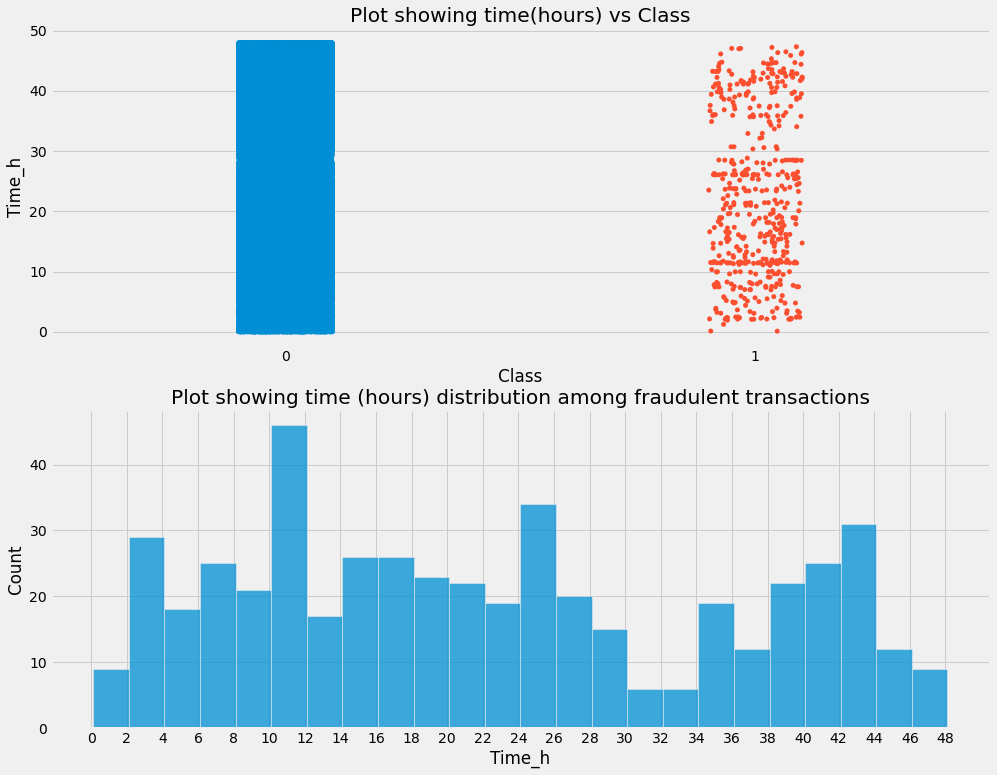

In [213]:
# scatter plot and strip plot to observe the distribution of classes with time
plt.subplots(1,2,figsize=[15,12])
plt.subplot(2,1,1)
sns.stripplot(x=df['Class'],y=df['Time_h'])
plt.title('Plot showing time(hours) vs Class')
plt.subplot(2,1,2)
sns.histplot(df[df['Class']==1].Time_h,binwidth=2)
plt.xticks(range(0,50,2))
plt.title('Plot showing time (hours) distribution among fraudulent transactions')
plt.show()


Most fraudulent transactions occur between 10-12 hours. <br>
The first couple of hours see less transactions comparitively. 

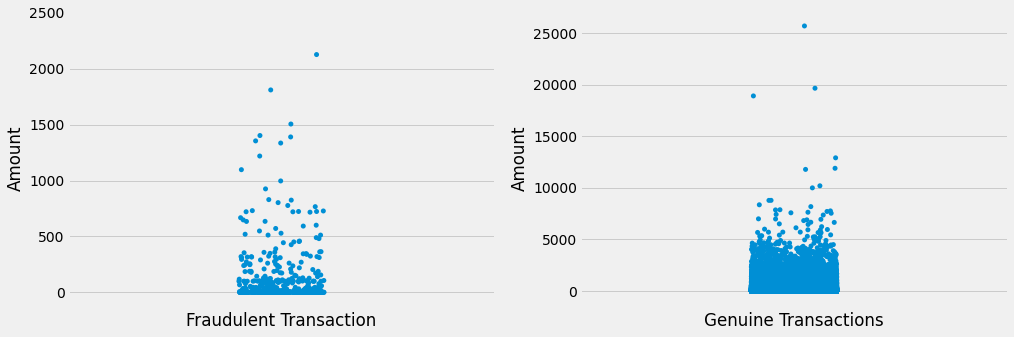

In [214]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.subplots(1,2,figsize=[15,5])
plt.subplot(1,2,1)
sns.stripplot(y=df[df['Class']==1].Amount)
plt.yticks(range(0,3000,500))
plt.xlabel('Fraudulent Transaction')
plt.subplot(1,2,2)
sns.stripplot(y=df[df['Class']==0].Amount)
plt.yticks(range(0,30000,5000))
plt.xlabel('Genuine Transactions')
plt.show()

The max amounting fraud has been between 2000 USD TO 2500 USD. Most fraud clusters transactions are between 0 - 500 USD.

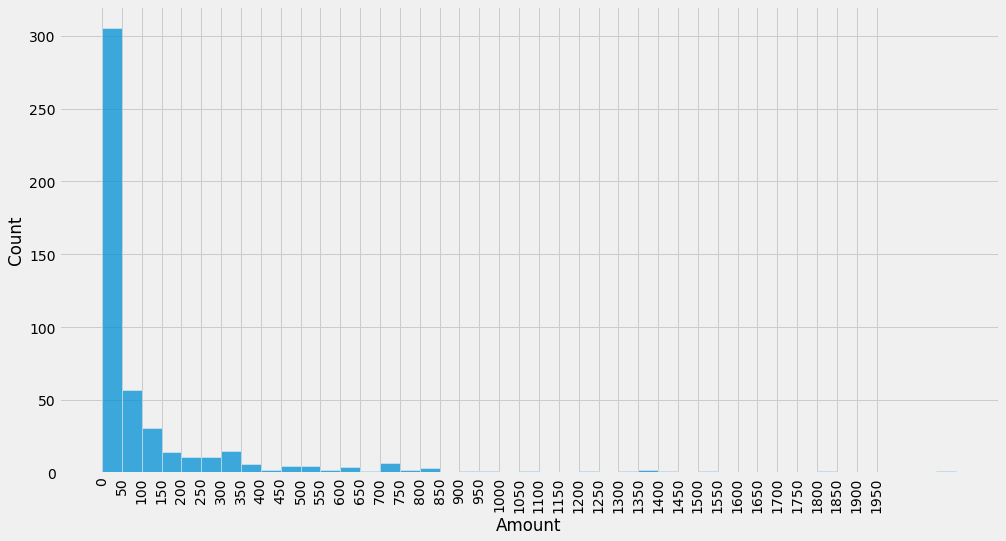

In [215]:
plt.figure(figsize=(15, 8))
sns.histplot(df[df['Class']==1].Amount,binwidth=50)
plt.xticks(range(0,2000,50),rotation=90)
plt.show()

We can observe that most fraudulent transactions are between 0-50 USD.

In [216]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Time_h'],
      dtype='object')

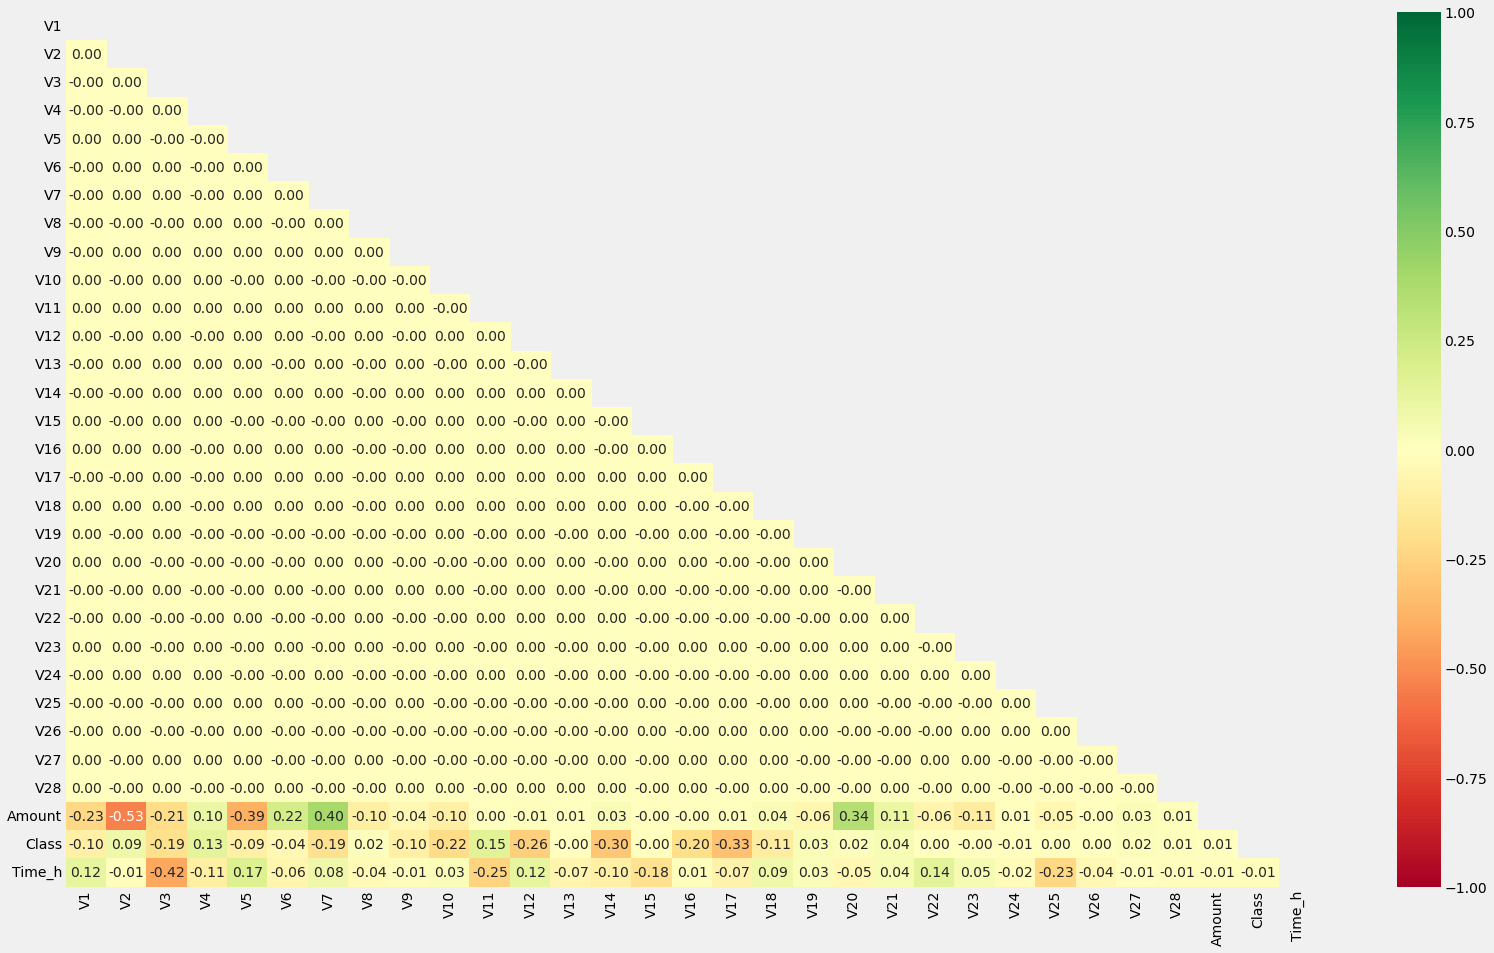

In [217]:
#plotting heatmap to observe correaltions
mask=np.triu(df.corr())
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True,vmin=-1,vmax=1,mask=mask,fmt='.2f')
plt.show()

- V7 and Amount have the highest positive correaltion.
- V2 and Amount have the highest negative correaltion.

In [218]:
# Dropping unnecessary columns
# Since we do not infer anything specifically from the time column we can go ahead and drop the same. 
df=df.drop(columns=['Time_h'])

In [219]:
#checking columns

df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [220]:
df.shape

(284807, 30)

### Splitting the data into train & test data

In [221]:
#importing the required libraries
from sklearn.model_selection import train_test_split

In [222]:
y=df.pop('Class')
X=df

In [223]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [224]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [225]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(213605, 29)
(71202, 29)
(213605,)
(71202,)


In [226]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,...,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000
mean,0.002104,0.001183,-0.000590,0.000145,0.000604,0.001335,0.000253,-0.002156,0.000503,0.000037,...,0.000263,0.000097,-0.000479,0.000135,0.000651,0.000155,-0.000110,-0.000262,-0.000385,88.254529
std,1.959285,1.652154,1.514560,1.416411,1.372379,1.328620,1.225264,1.206601,1.097903,1.087256,...,0.763285,0.738888,0.726033,0.621207,0.605784,0.521140,0.482784,0.398633,0.331647,245.324403
min,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.320155,-24.588262,...,-28.009635,-34.830382,-10.933144,-32.828995,-2.836627,-8.696627,-2.534330,-22.565679,-11.710896,0.000000
25%,-0.917299,-0.597954,-0.891539,-0.848352,-0.691743,-0.767001,-0.552186,-0.209343,-0.642050,-0.534113,...,-0.211806,-0.228274,-0.542413,-0.162066,-0.354178,-0.316703,-0.327231,-0.071048,-0.053133,5.560000
50%,0.020306,0.066398,0.179559,-0.018732,-0.053579,-0.273112,0.040608,0.021262,-0.049272,-0.092764,...,-0.062616,-0.030108,0.005757,-0.011170,0.041045,0.016918,-0.052853,0.001106,0.011156,22.000000
75%,1.316631,0.802934,1.027773,0.745359,0.612262,0.399146,0.571964,0.325830,0.597027,0.454967,...,0.132942,0.186090,0.527836,0.147372,0.440879,0.351255,0.241419,0.090794,0.078224,77.550000
max,2.454930,22.057729,9.382558,16.715537,34.801666,23.917837,44.054461,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.083545,4.022866,7.519589,3.220178,12.152401,33.847808,19656.530000


### Plotting the distribution of a variable

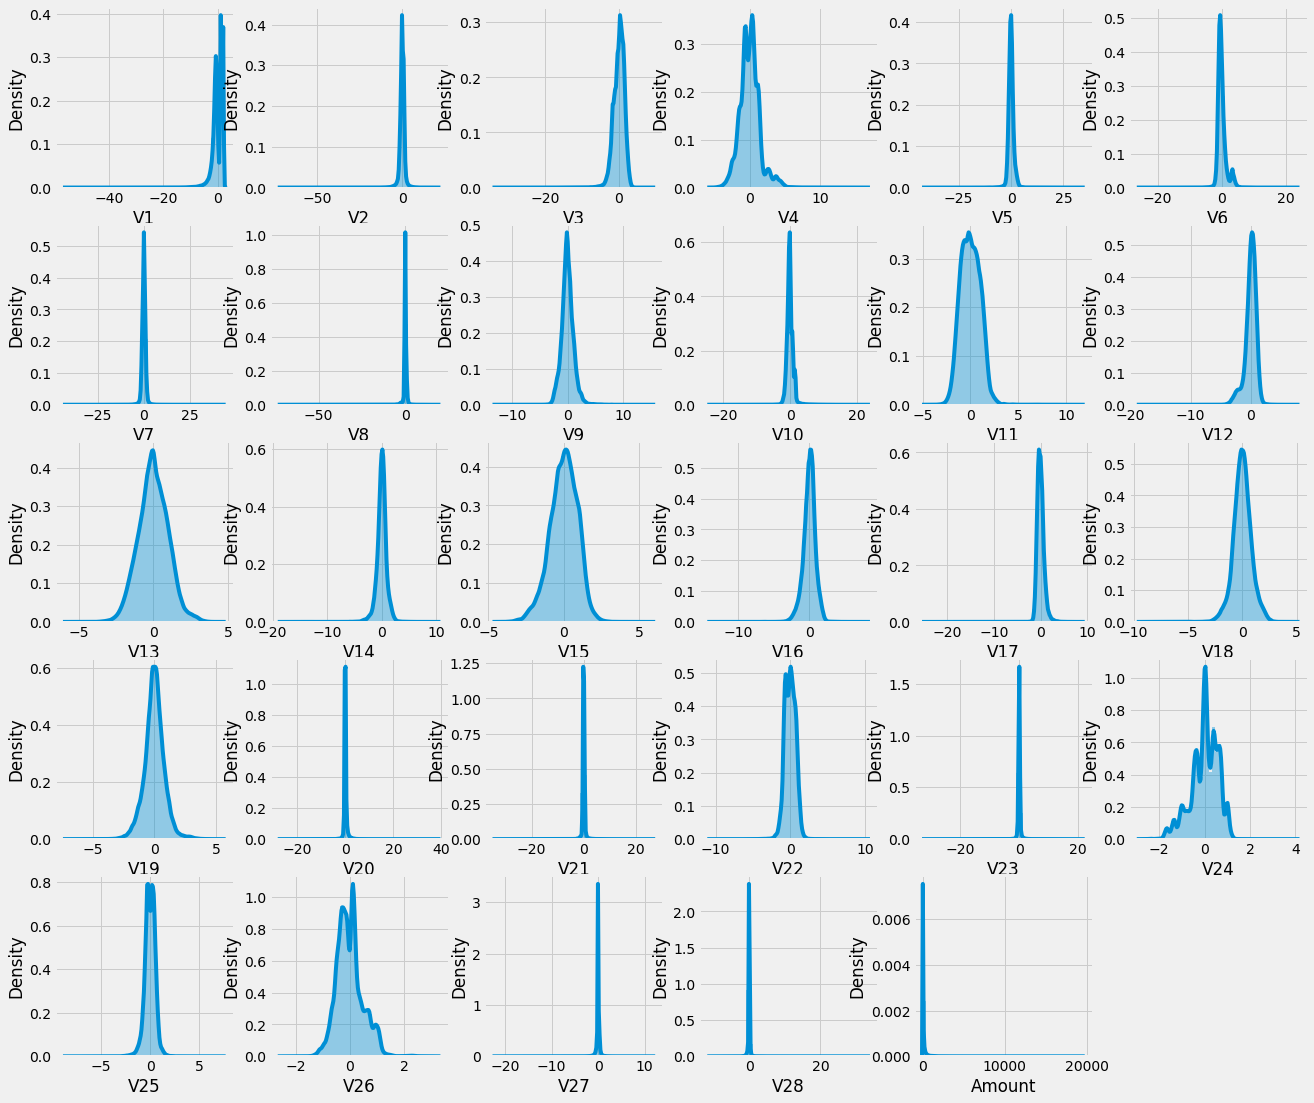

In [227]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,18))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

We can observe some data skewness. We need transform the data.

### There is skewness present in the distribution
- We need to make distribution more gaussian

In [228]:
skewness=df.skew()

In [229]:
#filtering columns based on the skewness to transform them later
columns=skewness[skewness<-0.5].index|skewness[skewness>0.5].index
print(columns)

Index(['Amount', 'V1', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V20', 'V21',
       'V23', 'V24', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9'],
      dtype='object')


In [230]:
# - Applying : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer()
X_train[columns]=power.fit_transform(X_train[columns])
X_test[columns]=power.transform(X_test[columns])

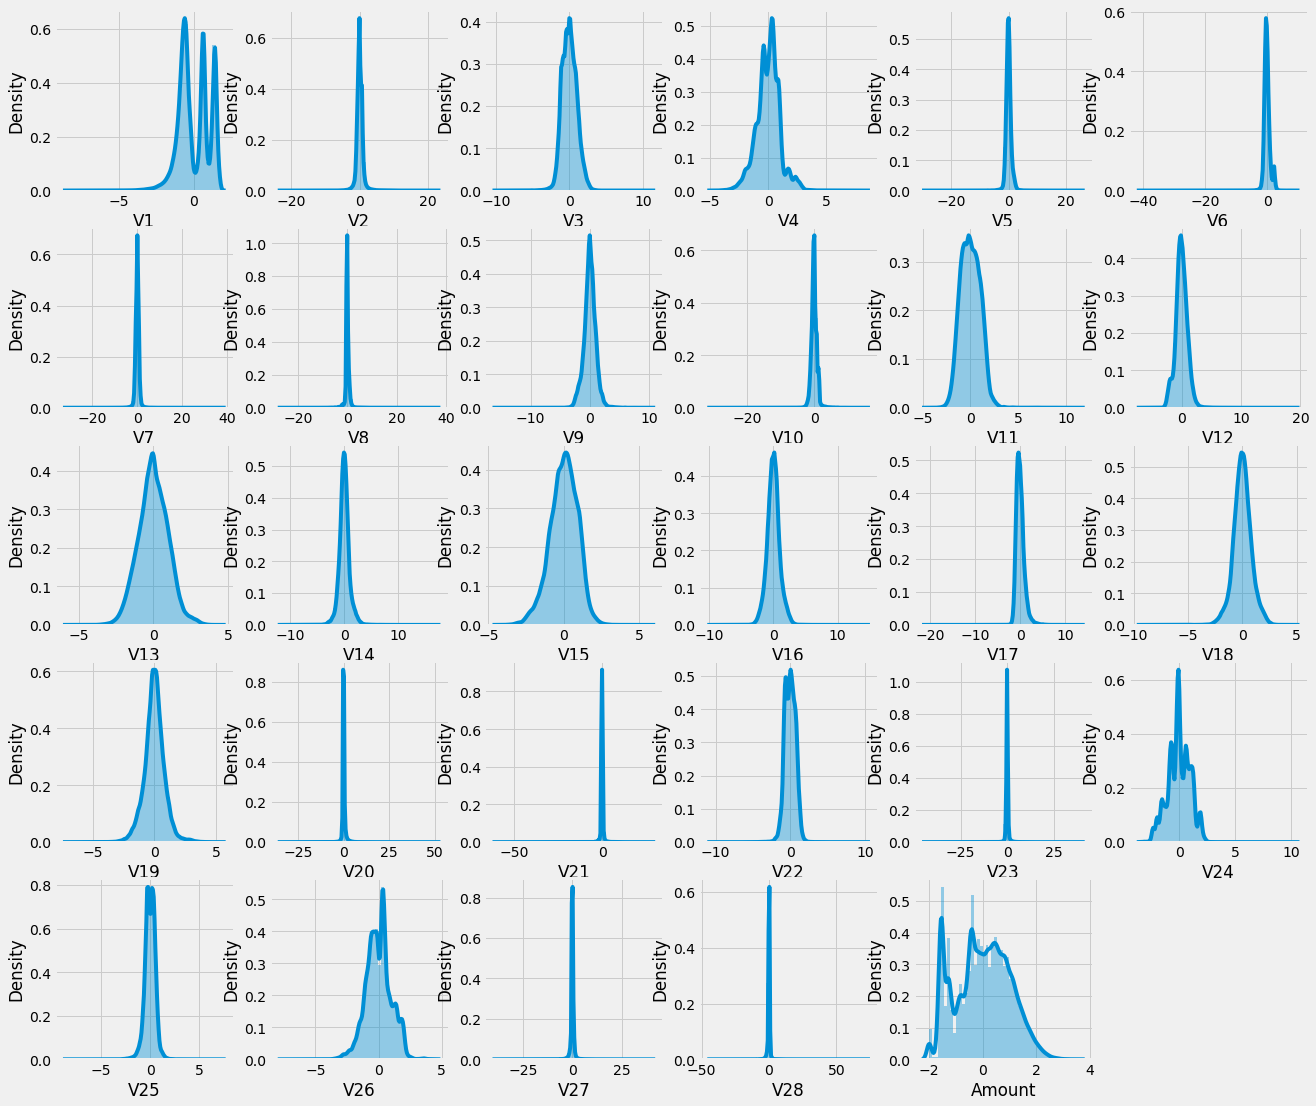

In [231]:
# plot the histogram of a variable from the dataset again to see the result 

var = X_train.columns

plt.figure(figsize=(20,18))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

We observe that the skewness has been taken care of.

In [232]:
#scaling the amount column since the rest of the columns are PCA transformed. 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Amount']]=scaler.fit_transform(X_train[['Amount']])
X_test[['Amount']]=scaler.transform(X_test[['Amount']])

## Defining functions for Model Building.

In [233]:
#importing the required libraries for model building. 
from sklearn.metrics import roc_curve,roc_auc_score,f1_score, classification_report
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression

In [234]:
#Drawing roc curve

def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve(area=%0.2f'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver operating curve')
    plt.legend(loc='lower right')
    plt.show()
    return None 

In [235]:
# function to evaluate our model.

def model_metrics(x,y):
    print(f'F1 score:{round(f1_score(x,y)*100,2)}')
    print(f'Classificaton report:\n {classification_report(x,y)}')

## Model Building
## 1. Logistic Regression
- Building different models on the imbalanced dataset.

In [236]:
# Logistic Regression
params={'C':[0.01,0.1,0.5,1,5,10]}
folds=KFold(n_splits=5,shuffle=True,random_state=101)
model_cv=GridSearchCV(estimator=LogisticRegression(),
                      param_grid=params,scoring='roc_auc', cv=folds,
                      n_jobs=-1,verbose=1,return_train_score=True)
model_cv.fit(X_train,y_train)
print('The roc_auc score is',model_cv.best_score_)
print('The best parameter is',model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The roc_auc score is 0.9788544862619964
The best parameter is {'C': 0.01}


In [237]:
#Considering the best parameter obtianed via GridSearchCV
model_cv=LogisticRegression(C=0.01)
model_cv.fit(X_train,y_train)

LogisticRegression(C=0.01)

- Evaluating train set

In [238]:
y_train_pred=model_cv.predict(X_train)

In [239]:
model_metrics(y_train,y_train_pred)

F1 score:70.05
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       0.88      0.58      0.70       367

    accuracy                           1.00    213605
   macro avg       0.94      0.79      0.85    213605
weighted avg       1.00      1.00      1.00    213605



In [240]:
y_train_pred_prob=model_cv.predict_proba(X_train)[:,1]

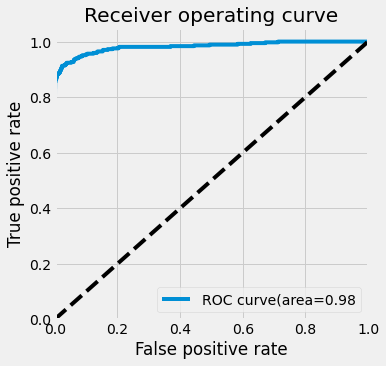

In [241]:
draw_roc(y_train,y_train_pred_prob)

In [242]:
#tabulating results in a data frame.
auc_score=round(metrics.roc_auc_score(y_train,y_train_pred_prob),2)
F1_score=round(f1_score(y_train,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Logistic Regression(Imbalanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Imbalanced Dataset) Train,0.98,0.7


- Evaluating test set

In [243]:
#evaluating the test set
y_test_pred=model_cv.predict(X_test) 
model_metrics(y_test,y_test_pred)

F1 score:71.57
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.92      0.58      0.72       125

    accuracy                           1.00     71202
   macro avg       0.96      0.79      0.86     71202
weighted avg       1.00      1.00      1.00     71202



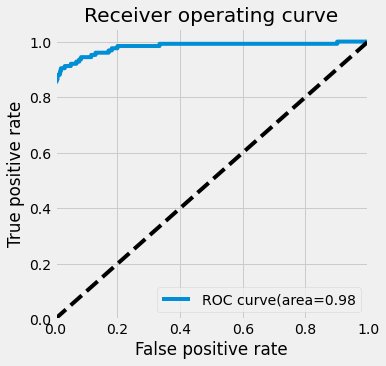

In [244]:
y_test_pred_prob=model_cv.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [245]:
#tabulating results in a data frame.
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
final_results=pd.DataFrame({'Model':['Logistic Regression(Imbalanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
final_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Imbalanced Dataset) Test,0.98,0.72


In [246]:
final_results=final_results.append(train_results)
final_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Imbalanced Dataset) Test,0.98,0.72
0,Logistic Regression(Imbalanced Dataset) Train,0.98,0.70


- The LogReg model on Imbalanced data set does reasonably well.

## Decision Tree

In [247]:
from sklearn.tree import DecisionTreeClassifier
params={'max_depth': range(5,15,5),
            'min_samples_leaf': range(50,150,50),
            'min_samples_split': range(50,150,50)}

dt=DecisionTreeClassifier()
model_dt=GridSearchCV(estimator=dt,param_grid=params,scoring='roc_auc',cv=3,n_jobs=-1,verbose=1)
model_dt.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [248]:
print('The roc_auc score is',model_dt.best_score_)
print('The best parameter is',model_dt.best_params_)

The roc_auc score is 0.9384304388333615
The best parameter is {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [249]:
#rebulidng the model with the best parameteres. 

dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth= 10, min_samples_leaf= 100, min_samples_split= 100)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [250]:
y_train_pred=dt.predict(X_train)
model_metrics(y_train,y_train_pred)

F1 score:72.0
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       0.79      0.66      0.72       367

    accuracy                           1.00    213605
   macro avg       0.89      0.83      0.86    213605
weighted avg       1.00      1.00      1.00    213605



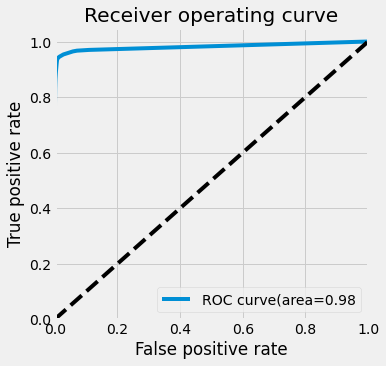

In [251]:
y_train_pred_prob=dt.predict_proba(X_train)[:,1]
draw_roc(y_train,y_train_pred_prob)

In [252]:
#tabulating results in a data frame.
auc_score=round(metrics.roc_auc_score(y_train,y_train_pred_prob),2)
F1_score=round(f1_score(y_train,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Decision Tree (Imbalanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Imbalanced Dataset) Train,0.98,0.72


Evaluating Test Set

In [253]:
y_test_pred=dt.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:69.41
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.81      0.61      0.69       125

    accuracy                           1.00     71202
   macro avg       0.90      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



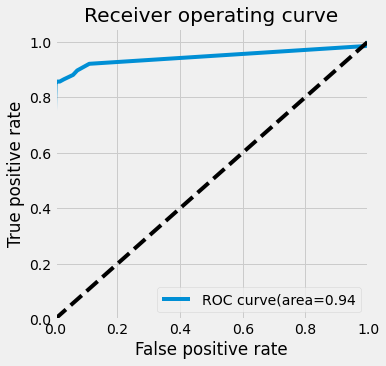

In [254]:
y_test_pred_prob=dt.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [255]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
dt_results=pd.DataFrame({'Model':['Decision Tree (Imbalanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
dt_results


,Model,auc_roc_score,F1_score
0,Decision Tree (Imbalanced Dataset) Test,0.94,0.69


In [256]:
dt_results=train_results.append(dt_results)
dt_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Imbalanced Dataset) Train,0.98,0.72
0,Decision Tree (Imbalanced Dataset) Test,0.94,0.69


In [257]:
final_results=final_results.append(dt_results)
final_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Imbalanced Dataset) Test,0.98,0.72
0,Logistic Regression(Imbalanced Dataset) Train,0.98,0.70
0,Decision Tree (Imbalanced Dataset) Train,0.98,0.72
0,Decision Tree (Imbalanced Dataset) Test,0.94,0.69


- The Decision Tree performs decently as well but not better than Logreg.

## Random Forest

In [258]:
from sklearn.ensemble import RandomForestClassifier
cv = KFold(3, shuffle=True)
params={'max_depth': [10],
            'min_samples_leaf': [50,100],
            'min_samples_split': [25,50],'n_estimators':[200]}

rf=RandomForestClassifier()
model_rf=GridSearchCV(estimator=rf,param_grid=params,scoring='roc_auc',cv=cv,n_jobs=-1,verbose=1)
model_rf.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [25, 50], 'n_estimators': [200]},
             scoring='roc_auc', verbose=1)

In [259]:
print('The roc_auc score is',model_rf.best_score_)
print('The best parameter is',model_rf.best_params_)

The roc_auc score is 0.9805133126900341
The best parameter is {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 200}


In [261]:

rf=RandomForestClassifier(random_state=100,max_depth= 10, min_samples_leaf= 50, min_samples_split= 25,n_estimators= 200)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=25,
                       n_estimators=200, random_state=100)

In [262]:
y_train_pred=rf.predict(X_train)
model_metrics(y_train,y_train_pred)

F1 score:75.57
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       0.85      0.68      0.76       367

    accuracy                           1.00    213605
   macro avg       0.93      0.84      0.88    213605
weighted avg       1.00      1.00      1.00    213605



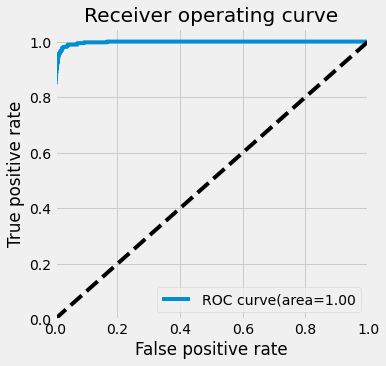

In [263]:
y_train_pred_prob=rf.predict_proba(X_train)[:,1]
draw_roc(y_train,y_train_pred_prob)

In [264]:
auc_score=round(metrics.roc_auc_score(y_train,y_train_pred_prob),2)
F1_score=round(f1_score(y_train,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Random Forest (Imbalanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Random Forest (Imbalanced Dataset) Train,1.0,0.76


- Evaluating Test Set

In [265]:
y_test_pred=rf.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:76.15
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.89      0.66      0.76       125

    accuracy                           1.00     71202
   macro avg       0.95      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202



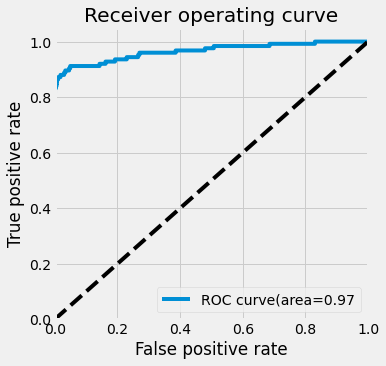

In [266]:
y_test_pred_prob=rf.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [267]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
rf_results=pd.DataFrame({'Model':['Random Forest (Imbalanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
rf_results

,Model,auc_roc_score,F1_score
0,Random Forest (Imbalanced Dataset) Test,0.97,0.76


In [268]:
rf_results=train_results.append(rf_results)
rf_results

,Model,auc_roc_score,F1_score
0,Random Forest (Imbalanced Dataset) Train,1.00,0.76
0,Random Forest (Imbalanced Dataset) Test,0.97,0.76


In [269]:
final_results=final_results.append(rf_results)
final_results 

,Model,auc_roc_score,F1_score
0,Logistic Regression(Imbalanced Dataset) Test,0.98,0.72
0,Logistic Regression(Imbalanced Dataset) Train,0.98,0.70
0,Decision Tree (Imbalanced Dataset) Train,0.98,0.72
0,Decision Tree (Imbalanced Dataset) Test,0.94,0.69
0,Random Forest (Imbalanced Dataset) Train,1.00,0.76
0,Random Forest (Imbalanced Dataset) Test,0.97,0.76


- Random forest performs better than Logreg and Decision Tree

## XGBoost

In [270]:
from xgboost import XGBClassifier

folds=3
params={'learning_rate':[0.1,0.2],'max_depth':[3,5],'min_child_weight': [11]}
XG_boost=XGBClassifier(n_estimators=200,eval_metric='logloss',use_label_encoder=False)
model_cv=GridSearchCV(estimator=XG_boost,
                      param_grid=params,scoring='roc_auc', cv=folds,
                      n_jobs=-1,verbose=1,return_train_score=True)
model_cv.fit(X_train,y_train)
print('The roc_auc score is',model_cv.best_score_)
print('The best parameter is',model_cv.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The roc_auc score is 0.9814681017616138
The best parameter is {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 11}


In [271]:
#rebulidng model with best parameters
xg_boost=XGBClassifier(learning_rate=0.2,max_depth=5,n_estimators=200,min_child_weight=11,)
xg_boost.fit(X_train,y_train)

XGBClassifier(learning_rate=0.2, max_depth=5, min_child_weight=11,
              n_estimators=200)

In [272]:
#prediction on train set.
y_train_pred=xg_boost.predict(X_train)
model_metrics(y_train,y_train_pred)

F1 score:93.64
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       1.00      0.88      0.94       367

    accuracy                           1.00    213605
   macro avg       1.00      0.94      0.97    213605
weighted avg       1.00      1.00      1.00    213605



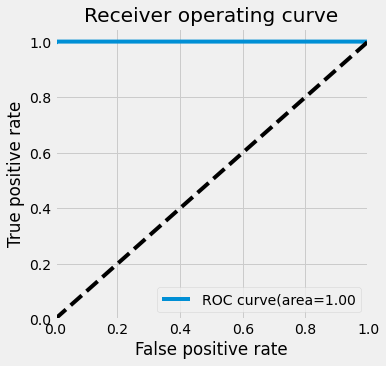

In [275]:
y_train_pred_prob=xg_boost.predict_proba(X_train)[:,1]

draw_roc(y_train,y_train_pred_prob)

In [274]:
#tabulating results in a data frame.
auc_score=round(metrics.roc_auc_score(y_train,y_train_pred_prob),2)
F1_score=round(f1_score(y_train,y_train_pred),2)
train_results=pd.DataFrame({'Model':['XG Boost (Imbalanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,XG Boost (Imbalanced Dataset) Train,1.0,0.94


Evaluating Test Set

In [276]:
y_test_pred=xg_boost.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:86.21
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.93      0.80      0.86       125

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



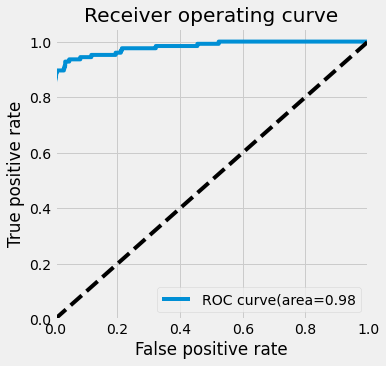

In [277]:
y_test_pred_prob=xg_boost.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [278]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
xg_boost_results=pd.DataFrame({'Model':['XG Boost(Imbalanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
xg_boost_results

,Model,auc_roc_score,F1_score
0,XG Boost(Imbalanced Dataset) Test,0.98,0.86


In [279]:
xg_boost_results=train_results.append(xg_boost_results)
xg_boost_results

,Model,auc_roc_score,F1_score
0,XG Boost (Imbalanced Dataset) Train,1.00,0.94
0,XG Boost(Imbalanced Dataset) Test,0.98,0.86


In [280]:
final_results=final_results.append(xg_boost_results)

In [281]:
final_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Imbalanced Dataset) Test,0.98,0.72
0,Logistic Regression(Imbalanced Dataset) Train,0.98,0.70
0,Decision Tree (Imbalanced Dataset) Train,0.98,0.72
0,Decision Tree (Imbalanced Dataset) Test,0.94,0.69
0,Random Forest (Imbalanced Dataset) Train,1.00,0.76
0,Random Forest (Imbalanced Dataset) Test,0.97,0.76
0,XG Boost (Imbalanced Dataset) Train,1.00,0.94
0,XG Boost(Imbalanced Dataset) Test,0.98,0.86



- XGBoost seems like the most efficient model out of all the models tried out on imbalanced dataset.

### Printing the important features of the XGBoost model
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


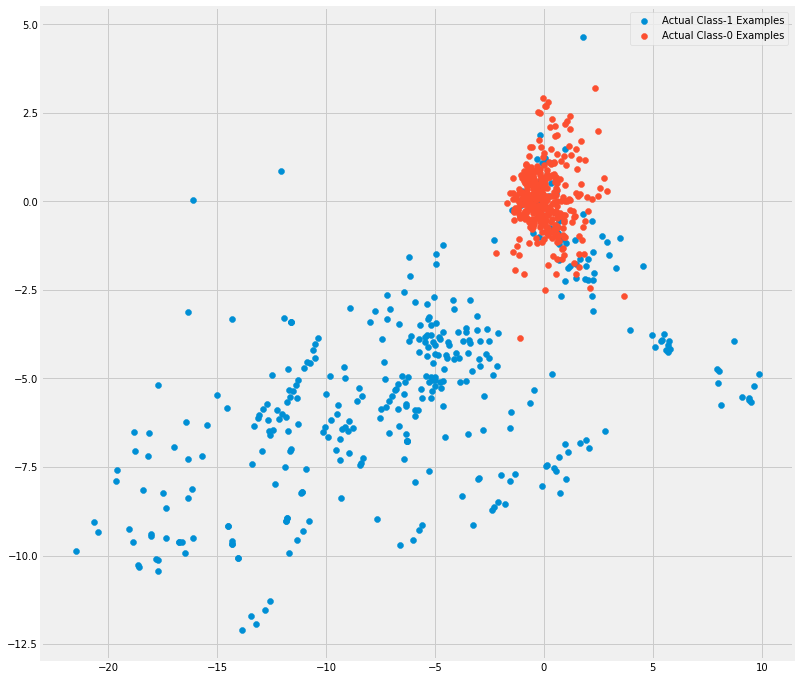

In [282]:
var_imp = []
for i in xg_boost.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xg_boost.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xg_boost.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xg_boost.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xg_boost.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xg_boost.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [283]:
#finding the threshold from the ROC curve.
print('Train auc =', metrics.roc_auc_score(y_train,y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999735619252674
0.008222543


- We note that the best train threshold is at 0.0082.

## Model Building with Balanced Data Set


- Random Oversampling

In [284]:
from imblearn.over_sampling import RandomOverSampler

oversample=RandomOverSampler(sampling_strategy='minority')
X_over,y_over=oversample.fit_resample(X_train,y_train)


In [285]:
y_over.value_counts()

0    213238
1    213238
Name: Class, dtype: int64

- We notice that the class imbalance is taken care of

## Logistic Regression with Random Oversampling

Training Data Set

In [286]:
params={'C':[0.01,0.1,0.5,1,5,10]}
folds=KFold(n_splits=5,shuffle=True,random_state=101)
model_cv=GridSearchCV(estimator=LogisticRegression(),
                      param_grid=params,scoring='roc_auc', cv=folds,
                      n_jobs=-1,verbose=1,return_train_score=True)
model_cv.fit(X_over,y_over)
print('The roc_auc score is',model_cv.best_score_)
print('The best parameter is',model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The roc_auc score is 0.987610381569929
The best parameter is {'C': 5}


In [287]:
#fitting and rebulding the model with best params
model_cv=LogisticRegression(C=5)
model_cv.fit(X_over,y_over)

LogisticRegression(C=5)

In [288]:
y_train_pred=model_cv.predict(X_over)

In [289]:
model_metrics(y_over,y_train_pred)

F1 score:94.85
Classificaton report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    213238
           1       0.97      0.93      0.95    213238

    accuracy                           0.95    426476
   macro avg       0.95      0.95      0.95    426476
weighted avg       0.95      0.95      0.95    426476



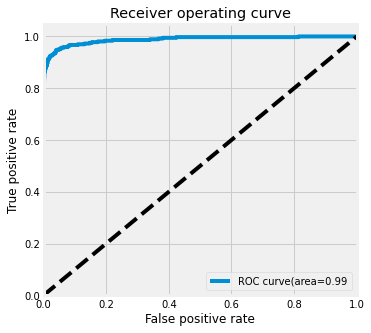

In [290]:
y_train_pred_prob=model_cv.predict_proba(X_over)[:,1]
draw_roc(y_over,y_train_pred_prob)

In [291]:
auc_score=round(metrics.roc_auc_score(y_over,y_train_pred_prob),2)
F1_score=round(f1_score(y_over,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Logistic Regression(Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95


Test Data Set

In [292]:
y_test_pred=model_cv.predict(X_test) 
model_metrics(y_test,y_test_pred)

F1 score:10.68
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71077
           1       0.06      0.90      0.11       125

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



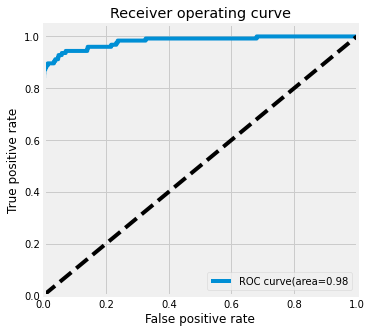

In [293]:
y_test_pred_prob=model_cv.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [294]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['Logistic Regression(Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Test,0.98,0.11


In [295]:
balanced_results=train_results.append(test_results)
balanced_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.11


- The above Logistic Regression Model has a very low F1 score.

## Decision Tree with Random Oversampling

In [296]:
from sklearn.tree import DecisionTreeClassifier
params={'max_depth': range(5,15,5),
            'min_samples_leaf': range(50,150,50),
            'min_samples_split': range(50,150,50)}

dt=DecisionTreeClassifier()
model_dt=GridSearchCV(estimator=dt,param_grid=params,scoring='roc_auc',cv=3,n_jobs=-1,verbose=1)
model_dt.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [297]:
print('The roc_auc score is',model_dt.best_score_)
print('The best parameter is',model_dt.best_params_)

The roc_auc score is 0.9992183946516677
The best parameter is {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [298]:
#rebulidng model with best parameter
dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth= 10, min_samples_leaf= 50, min_samples_split= 50)
dt.fit(X_over,y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [299]:
y_train_pred=dt.predict(X_over)
model_metrics(y_over,y_train_pred)

F1 score:99.48
Classificaton report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    213238
           1       1.00      0.99      0.99    213238

    accuracy                           0.99    426476
   macro avg       0.99      0.99      0.99    426476
weighted avg       0.99      0.99      0.99    426476



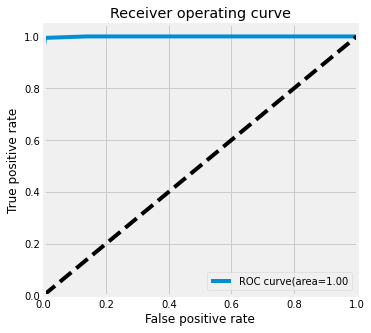

In [300]:
y_train_pred_prob=dt.predict_proba(X_over)[:,1]
draw_roc(y_over,y_train_pred_prob)

In [301]:
auc_score=round(metrics.roc_auc_score(y_over,y_train_pred_prob),2)
F1_score=round(f1_score(y_over,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Decision Tree (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Train,1.0,0.99


- Evaluating Test set

In [302]:
y_test_pred=dt.predict(X_test)
model_metrics(y_test,y_test_pred)


F1 score:33.83
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71077
           1       0.21      0.82      0.34       125

    accuracy                           0.99     71202
   macro avg       0.61      0.91      0.67     71202
weighted avg       1.00      0.99      1.00     71202



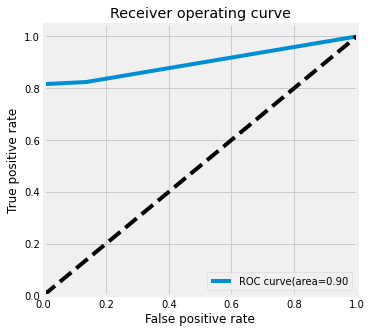

In [303]:
y_test_pred_prob=dt.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [304]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['Decision Tree (Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Test,0.9,0.34


In [305]:
dt_results=train_results.append(test_results)
dt_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Train,1.0,0.99
0,Decision Tree (Balanced Dataset) Test,0.9,0.34


In [306]:
balanced_results=balanced_results.append(dt_results)
balanced_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.11
0,Decision Tree (Balanced Dataset) Train,1.00,0.99
0,Decision Tree (Balanced Dataset) Test,0.90,0.34


 - The decision Tree has very poor F1 score.

## Random Forest with Oversampling

In [307]:
from sklearn.ensemble import RandomForestClassifier
cv = KFold(3, shuffle=True)
params={'max_depth': [10],
            'min_samples_leaf': [50,100],
            'min_samples_split': [25,50],'n_estimators':[200]}

rf=RandomForestClassifier()
model_rf=GridSearchCV(estimator=rf,param_grid=params,scoring='roc_auc',cv=cv,n_jobs=-1,verbose=1)
model_rf.fit(X_over,y_over)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [25, 50], 'n_estimators': [200]},
             scoring='roc_auc', verbose=1)

In [308]:
print('The roc_auc score is',model_rf.best_score_)
print('The best parameter is',model_rf.best_params_)

The roc_auc score is 0.9999354788229153
The best parameter is {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [309]:

rf=RandomForestClassifier(random_state=100,max_depth= 10, min_samples_leaf= 50, min_samples_split= 50,n_estimators= 200)
rf.fit(X_over,y_over)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=200, random_state=100)

In [310]:
y_train_pred=rf.predict(X_over)
model_metrics(y_over,y_train_pred)

F1 score:99.42
Classificaton report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    213238
           1       1.00      0.99      0.99    213238

    accuracy                           0.99    426476
   macro avg       0.99      0.99      0.99    426476
weighted avg       0.99      0.99      0.99    426476



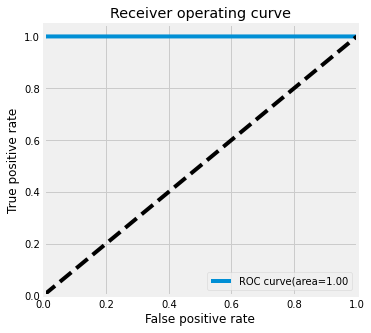

In [311]:
y_train_pred_prob=rf.predict_proba(X_over)[:,1]
draw_roc(y_over,y_train_pred_prob)

In [312]:
auc_score=round(metrics.roc_auc_score(y_over,y_train_pred_prob),2)
F1_score=round(f1_score(y_over,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Random Forest (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Train,1.0,0.99


- Evaluating Test Data Set

In [313]:
y_test_pred=rf.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:75.44
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.68      0.85      0.75       125

    accuracy                           1.00     71202
   macro avg       0.84      0.92      0.88     71202
weighted avg       1.00      1.00      1.00     71202



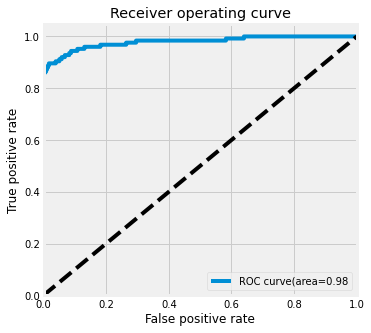

In [314]:
y_test_pred_prob=rf.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [315]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
rf_results=pd.DataFrame({'Model':['Random Forest (Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
rf_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Test,0.98,0.75


In [316]:
rf_results=train_results.append(rf_results)
rf_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.75


In [317]:
balanced_results=balanced_results.append(rf_results)
balanced_results 

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.11
0,Decision Tree (Balanced Dataset) Train,1.00,0.99
0,Decision Tree (Balanced Dataset) Test,0.90,0.34
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.75


## XGBoost with Random Oversampling

In [318]:
from xgboost import XGBClassifier

folds=3
params={'learning_rate':[0.2,0.5],'subsample': [0.3, 0.6, 0.9]}
XG_boost=XGBClassifier(n_estimators=200,max_depth=2,eval_metric='logloss',use_label_encoder=False)
model_cv=GridSearchCV(estimator=XG_boost,
                      param_grid=params,scoring='roc_auc', cv=folds,
                      n_jobs=-1,verbose=1,return_train_score=True)
model_cv.fit(X_over,y_over)
print('The roc_auc score is',model_cv.best_score_)
print('The best parameter is',model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The roc_auc score is 0.999977328876731
The best parameter is {'learning_rate': 0.5, 'subsample': 0.9}


In [319]:
xg_boost=XGBClassifier(learning_rate=0.5,subsample=0.9)
xg_boost.fit(X_over,y_over)

XGBClassifier(learning_rate=0.5, subsample=0.9)

In [320]:
#prediction on train set.
y_train_pred=xg_boost.predict(X_over)
model_metrics(y_over,y_train_pred)

F1 score:100.0
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       1.00      1.00      1.00    213238

    accuracy                           1.00    426476
   macro avg       1.00      1.00      1.00    426476
weighted avg       1.00      1.00      1.00    426476



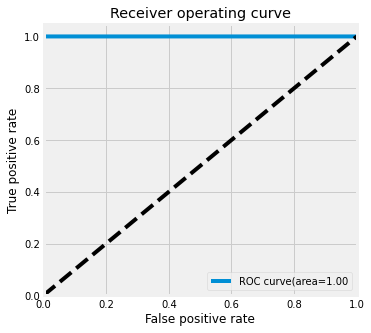

In [321]:
y_train_pred_prob=xg_boost.predict_proba(X_over)[:,1]

draw_roc(y_over,y_train_pred_prob)

In [322]:
#tabulating results in a data frame.
auc_score=round(metrics.roc_auc_score(y_over,y_train_pred_prob),2)
F1_score=round(f1_score(y_over,y_train_pred),2)
train_results=pd.DataFrame({'Model':['XG Boost (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,XG Boost (Balanced Dataset) Train,1.0,1.0


- Test Data Set

In [323]:
y_test_pred=xg_boost.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:86.07
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.88      0.84      0.86       125

    accuracy                           1.00     71202
   macro avg       0.94      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202



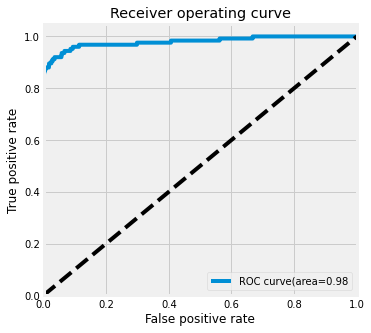

In [324]:
y_test_pred_prob=xg_boost.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [325]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['XG Boost(Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,XG Boost(Balanced Dataset) Test,0.98,0.86


In [326]:
xg_boost_results=train_results.append(test_results)

In [327]:
balanced_results_over=balanced_results.append(xg_boost_results)

In [328]:
balanced_results_over

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.11
0,Decision Tree (Balanced Dataset) Train,1.00,0.99
0,Decision Tree (Balanced Dataset) Test,0.90,0.34
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.75
0,XG Boost (Balanced Dataset) Train,1.00,1.00
0,XG Boost(Balanced Dataset) Test,0.98,0.86


 - Overall, for balanced data set using Oversampling XG_Boost turns out to be the best model followed by Random Forest.

### Print the class distribution after applying SMOTE 

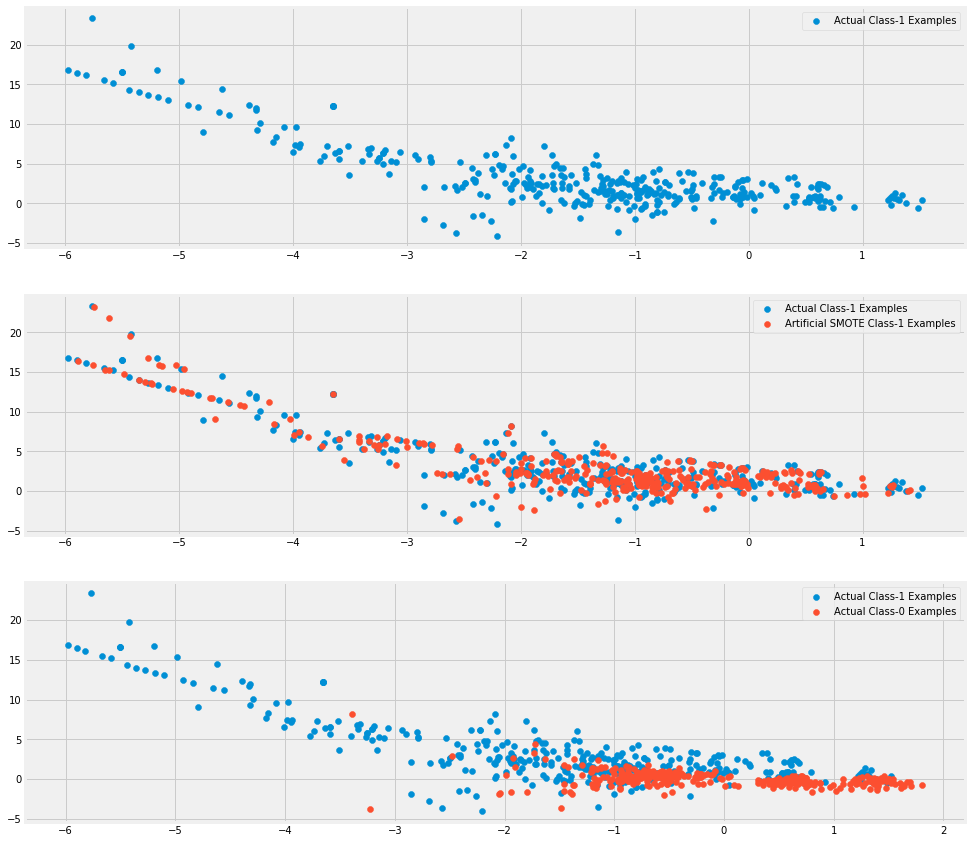

In [329]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [15, 15]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Logistic Regression using SMOTE

In [330]:
params={'C':[0.01,0.1,0.5,1,5,10]}
folds=KFold(n_splits=5,shuffle=True,random_state=101)
model_cv=GridSearchCV(estimator=LogisticRegression(),
                      param_grid=params,scoring='roc_auc', cv=folds,
                      n_jobs=-1,verbose=1,return_train_score=True)
model_cv.fit(X_train_smote,y_train_smote)
print('The roc_auc score is',model_cv.best_score_)
print('The best parameter is',model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The roc_auc score is 0.9897832363672846
The best parameter is {'C': 10}


In [331]:
#fitting and rebulding the model with best params
model_cv=LogisticRegression(C=10)
model_cv.fit(X_train_smote,y_train_smote)

LogisticRegression(C=10)

In [332]:
y_train_pred=model_cv.predict(X_train_smote)
model_metrics(y_train_smote,y_train_pred)

F1 score:94.63
Classificaton report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    213238
           1       0.97      0.92      0.95    213238

    accuracy                           0.95    426476
   macro avg       0.95      0.95      0.95    426476
weighted avg       0.95      0.95      0.95    426476



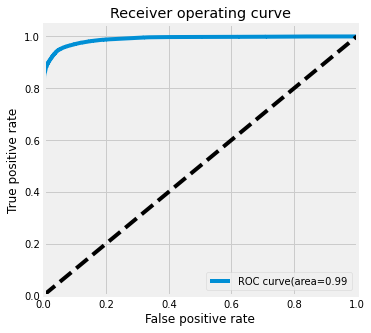

In [333]:
y_train_pred_prob=model_cv.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote,y_train_pred_prob)

In [334]:
auc_score=round(metrics.roc_auc_score(y_train_smote,y_train_pred_prob),2)
F1_score=round(f1_score(y_train_smote,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Logistic Regression(Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95


-Test Data Set

In [335]:
y_test_pred=model_cv.predict(X_test) 
model_metrics(y_test,y_test_pred)

F1 score:9.92
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71077
           1       0.05      0.90      0.10       125

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.54     71202
weighted avg       1.00      0.97      0.98     71202



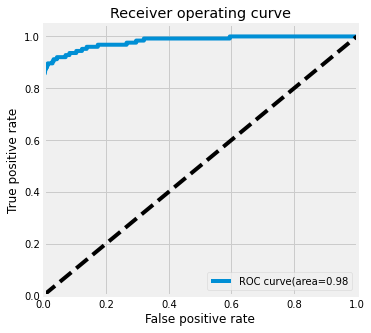

In [336]:
y_test_pred_prob=model_cv.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [337]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['Logistic Regression(Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Test,0.98,0.1


In [338]:
balanced_results=train_results.append(test_results)
balanced_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.10


- F1 score is way too low.

## Decision Tree with SMOTE

In [339]:
from sklearn.tree import DecisionTreeClassifier
params={'max_depth': range(5,15,5),
            'min_samples_leaf': range(50,150,50),
            'min_samples_split': range(50,150,50)}

dt=DecisionTreeClassifier()
model_dt=GridSearchCV(estimator=dt,param_grid=params,scoring='roc_auc',cv=3,n_jobs=-1,verbose=1)
model_dt.fit(X_train_smote,y_train_smote)
print('The roc_auc score is',model_dt.best_score_)
print('The best parameter is',model_dt.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
The roc_auc score is 0.9974195098689291
The best parameter is {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [340]:
#rebulidng model with best parameter
dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth= 10, min_samples_leaf= 50, min_samples_split= 100)
dt.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [341]:
y_train_pred=dt.predict(X_train_smote)
model_metrics(y_train_smote,y_train_pred)

F1 score:98.63
Classificaton report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    213238
           1       0.99      0.99      0.99    213238

    accuracy                           0.99    426476
   macro avg       0.99      0.99      0.99    426476
weighted avg       0.99      0.99      0.99    426476



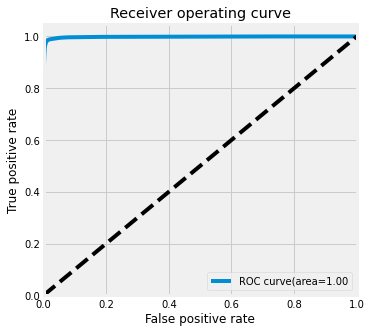

In [342]:
y_train_pred_prob=dt.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote,y_train_pred_prob)

In [343]:
auc_score=round(metrics.roc_auc_score(y_train_smote,y_train_pred_prob),2)
F1_score=round(f1_score(y_train_smote,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Decision Tree (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Train,1.0,0.99


- Test Data Set

In [344]:
y_test_pred=dt.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:17.83
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71077
           1       0.10      0.84      0.18       125

    accuracy                           0.99     71202
   macro avg       0.55      0.91      0.59     71202
weighted avg       1.00      0.99      0.99     71202



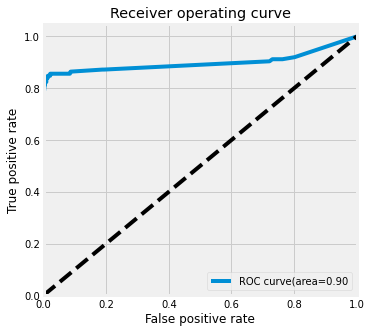

In [345]:
y_test_pred_prob=dt.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [346]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['Decision Tree (Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Test,0.9,0.18


In [347]:
dt_results=train_results.append(test_results)
dt_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Train,1.0,0.99
0,Decision Tree (Balanced Dataset) Test,0.9,0.18


In [348]:
balanced_results=balanced_results.append(dt_results)
balanced_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.10
0,Decision Tree (Balanced Dataset) Train,1.00,0.99
0,Decision Tree (Balanced Dataset) Test,0.90,0.18


- Again the F1 score seems very low.

## Random Forest with SMOTE.

In [349]:
from sklearn.ensemble import RandomForestClassifier
cv = KFold(3, shuffle=True)
params={'max_depth': [10],
            'min_samples_leaf': [50,100],
            'min_samples_split': [25,50],'n_estimators':[200]}

rf=RandomForestClassifier()
model_rf=GridSearchCV(estimator=rf,param_grid=params,scoring='roc_auc',cv=cv,n_jobs=-1,verbose=1)
model_rf.fit(X_train_smote,y_train_smote)
print('The roc_auc score is',model_rf.best_score_)
print('The best parameter is',model_rf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The roc_auc score is 0.9995550595804742
The best parameter is {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 200}


In [350]:

rf=RandomForestClassifier(random_state=100,max_depth= 10, min_samples_leaf= 50, min_samples_split= 25,n_estimators= 200)
rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=25,
                       n_estimators=200, random_state=100)

In [351]:
y_train_pred=rf.predict(X_train_smote)
model_metrics(y_train_smote,y_train_pred)

F1 score:99.16
Classificaton report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    213238
           1       1.00      0.99      0.99    213238

    accuracy                           0.99    426476
   macro avg       0.99      0.99      0.99    426476
weighted avg       0.99      0.99      0.99    426476



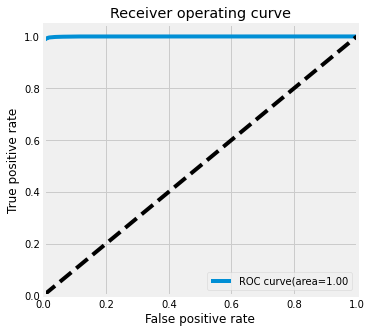

In [352]:
y_train_pred_prob=rf.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote,y_train_pred_prob)

In [353]:
auc_score=round(metrics.roc_auc_score(y_train_smote,y_train_pred_prob),2)
F1_score=round(f1_score(y_train_smote,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Random Forest (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Train,1.0,0.99


- Test Data

In [354]:
y_test_pred=rf.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:56.91
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.43      0.86      0.57       125

    accuracy                           1.00     71202
   macro avg       0.71      0.93      0.78     71202
weighted avg       1.00      1.00      1.00     71202



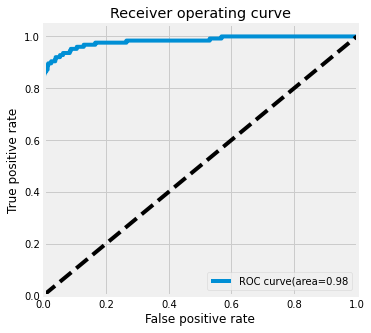

In [355]:
y_test_pred_prob=rf.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [356]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
rf_results=pd.DataFrame({'Model':['Random Forest (Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
rf_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Test,0.98,0.57


In [357]:
rf_results=train_results.append(rf_results)
rf_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.57


In [358]:
balanced_results=balanced_results.append(rf_results)
balanced_results 

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.10
0,Decision Tree (Balanced Dataset) Train,1.00,0.99
0,Decision Tree (Balanced Dataset) Test,0.90,0.18
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.57


- The F1 score seems to have improved slightly for Random Forest.

## XG_Boost with SMOTE

In [359]:
from xgboost import XGBClassifier

folds=3
params={'learning_rate':[0.2,0.5],'subsample': [0.3, 0.6, 0.9]}
XG_boost=XGBClassifier(n_estimators=200,max_depth=2,eval_metric='logloss',use_label_encoder=False)
model_cv=GridSearchCV(estimator=XG_boost,
                      param_grid=params,scoring='roc_auc', cv=folds,
                      n_jobs=-1,verbose=1,return_train_score=True)
model_cv.fit(X_train_smote,y_train_smote)
print('The roc_auc score is',model_cv.best_score_)
print('The best parameter is',model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The roc_auc score is 0.9999410809655463
The best parameter is {'learning_rate': 0.5, 'subsample': 0.9}


In [360]:
#taking the best parameters
xg_boost=XGBClassifier(learning_rate=0.5,subsample=0.9,)
xg_boost.fit(X_train_smote,y_train_smote)

XGBClassifier(learning_rate=0.5, subsample=0.9)

In [361]:
#prediction on train set.
y_train_pred=xg_boost.predict(X_train_smote)
model_metrics(y_train_smote,y_train_pred)

F1 score:99.93
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       1.00      1.00      1.00    213238

    accuracy                           1.00    426476
   macro avg       1.00      1.00      1.00    426476
weighted avg       1.00      1.00      1.00    426476



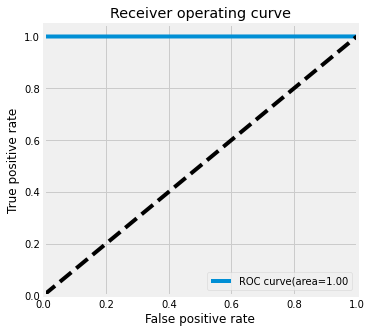

In [362]:
y_train_pred_prob=xg_boost.predict_proba(X_train_smote)[:,1]

draw_roc(y_train_smote,y_train_pred_prob)

In [363]:
#tabulating results in a data frame.
auc_score=round(metrics.roc_auc_score(y_train_smote,y_train_pred_prob),2)
F1_score=round(f1_score(y_train_smote,y_train_pred),2)
train_results=pd.DataFrame({'Model':['XG Boost (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,XG Boost (Balanced Dataset) Train,1.0,1.0


- Test Data

In [364]:
y_test_pred=xg_boost.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:58.31
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.44      0.86      0.58       125

    accuracy                           1.00     71202
   macro avg       0.72      0.93      0.79     71202
weighted avg       1.00      1.00      1.00     71202



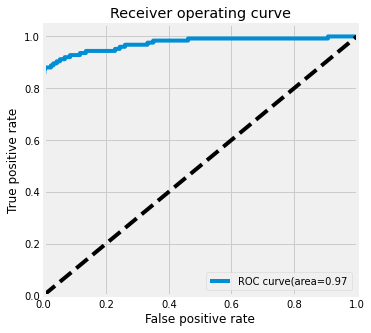

In [365]:
y_test_pred_prob=xg_boost.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [366]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['XG Boost(Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,XG Boost(Balanced Dataset) Test,0.97,0.58


In [367]:
xg_boost_results=train_results.append(test_results)
xg_boost_results

,Model,auc_roc_score,F1_score
0,XG Boost (Balanced Dataset) Train,1.00,1.00
0,XG Boost(Balanced Dataset) Test,0.97,0.58


In [368]:
smote_results=balanced_results.append(xg_boost_results)
smote_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.10
0,Decision Tree (Balanced Dataset) Train,1.00,0.99
0,Decision Tree (Balanced Dataset) Test,0.90,0.18
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.57
0,XG Boost (Balanced Dataset) Train,1.00,1.00
0,XG Boost(Balanced Dataset) Test,0.97,0.58


- XG_Boost with SMOTE provides the best result here, although it does not seem satisfactory

### Print the class distribution after applying ADASYN

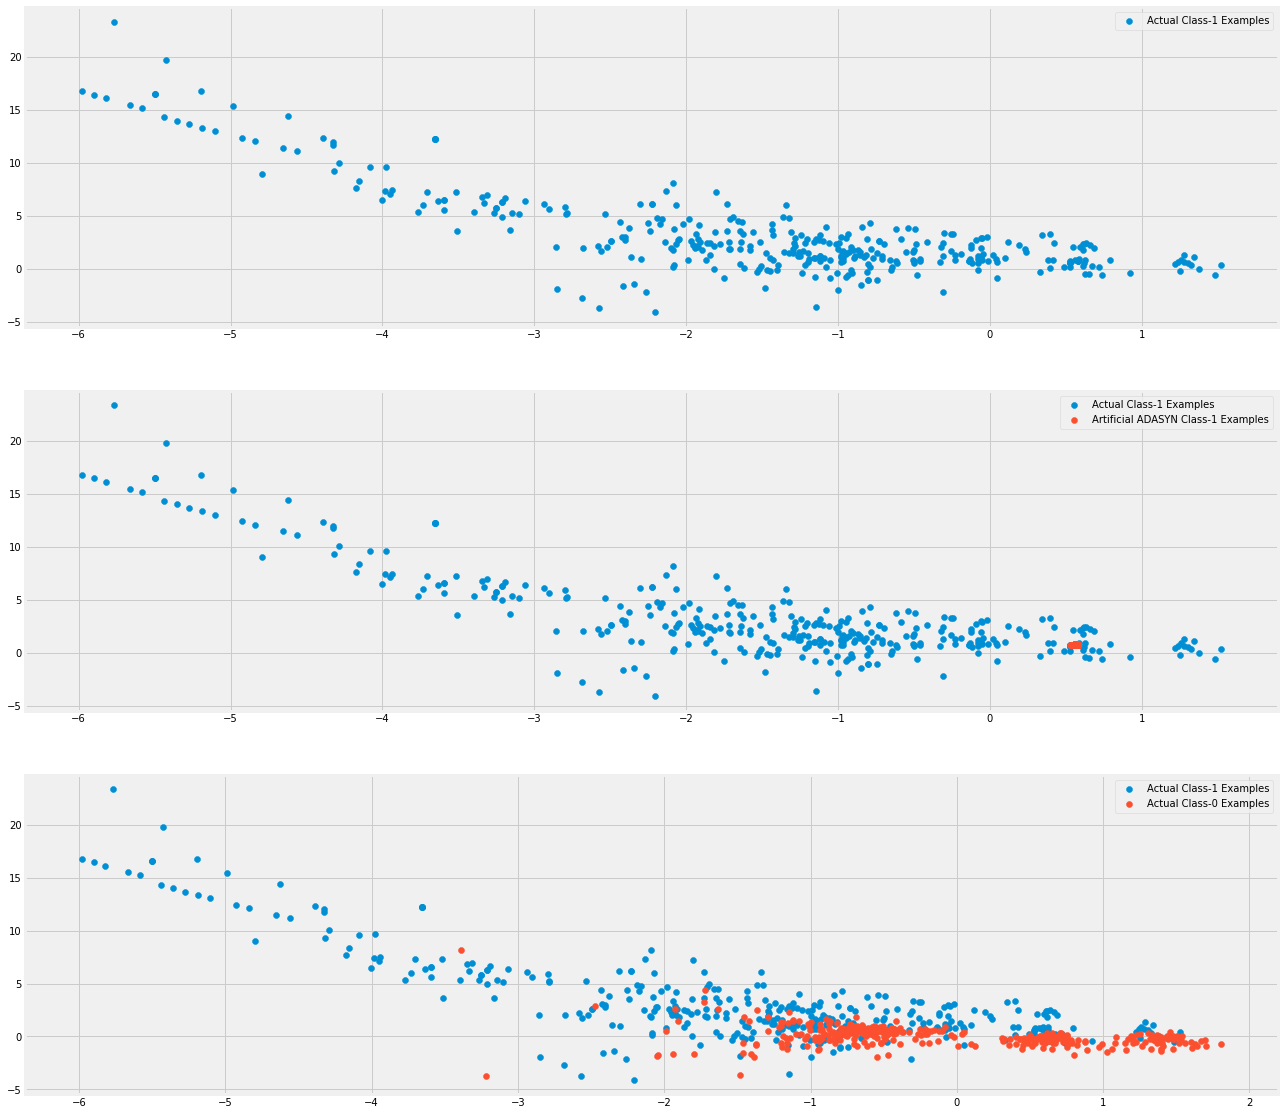

In [372]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Logistic Regression with ADASYN

In [373]:
params={'C':[0.01,0.1,0.5,1,5,10]}
folds=KFold(n_splits=5,shuffle=True,random_state=101)
model_cv=GridSearchCV(estimator=LogisticRegression(),
                      param_grid=params,scoring='roc_auc', cv=folds,
                      n_jobs=-1,verbose=1,return_train_score=True)
model_cv.fit(X_train_adasyn,y_train_adasyn)
print('The roc_auc score is',model_cv.best_score_)
print('The best parameter is',model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The roc_auc score is 0.9652846604974392
The best parameter is {'C': 10}


In [374]:
#fitting and rebulding the model with best params
model_cv=LogisticRegression(C=10)
model_cv.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(C=10)

In [375]:
y_train_pred=model_cv.predict(X_train_adasyn)
model_metrics(y_train_adasyn,y_train_adasyn)

F1 score:100.0
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       1.00      1.00      1.00    213193

    accuracy                           1.00    426431
   macro avg       1.00      1.00      1.00    426431
weighted avg       1.00      1.00      1.00    426431



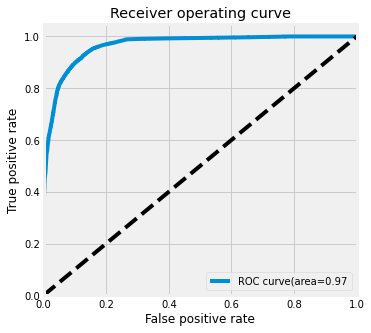

In [376]:
y_train_pred_prob=model_cv.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn,y_train_pred_prob)

In [377]:
auc_score=round(metrics.roc_auc_score(y_train_adasyn,y_train_pred_prob),2)
F1_score=round(f1_score(y_train_adasyn,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Logistic Regression(Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.97,0.89


- Test Data Set

In [378]:
y_test_pred=model_cv.predict(X_test) 
model_metrics(y_test,y_test_pred)

F1 score:3.76
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     71077
           1       0.02      0.94      0.04       125

    accuracy                           0.92     71202
   macro avg       0.51      0.93      0.50     71202
weighted avg       1.00      0.92      0.95     71202



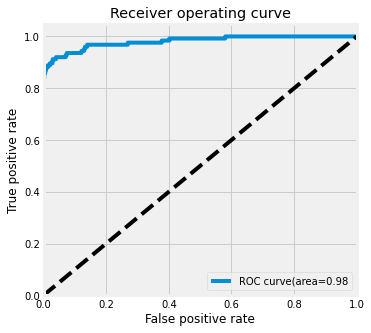

In [379]:
y_test_pred_prob=model_cv.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [380]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['Logistic Regression(Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Test,0.98,0.04


In [381]:
balanced_results=train_results.append(test_results)
balanced_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.97,0.89
0,Logistic Regression(Balanced Dataset) Test,0.98,0.04


## Decision Tree with ADASYN

In [382]:
from sklearn.tree import DecisionTreeClassifier
params={'max_depth': range(5,15,5),
            'min_samples_leaf': range(50,150,50),
            'min_samples_split': range(50,150,50)}

dt=DecisionTreeClassifier()
model_dt=GridSearchCV(estimator=dt,param_grid=params,scoring='roc_auc',cv=3,n_jobs=-1,verbose=1)
model_dt.fit(X_train_adasyn,y_train_adasyn)
print('The roc_auc score is',model_dt.best_score_)
print('The best parameter is',model_dt.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
The roc_auc score is 0.9300172241899484
The best parameter is {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [383]:
#rebulidng model with best parameter
dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth= 10, min_samples_leaf= 100, min_samples_split= 50)
dt.fit(X_train_adasyn,y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [384]:
y_train_pred=dt.predict(X_train_adasyn)
model_metrics(y_train_adasyn,y_train_pred)

F1 score:97.67
Classificaton report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    213238
           1       0.97      0.99      0.98    213193

    accuracy                           0.98    426431
   macro avg       0.98      0.98      0.98    426431
weighted avg       0.98      0.98      0.98    426431



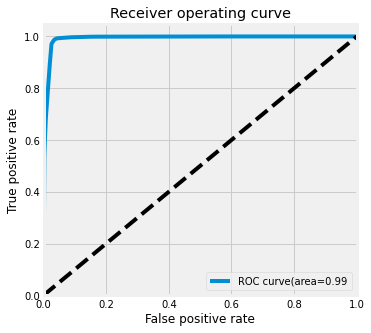

In [385]:
y_train_pred_prob=dt.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn,y_train_pred_prob)

In [386]:
auc_score=round(metrics.roc_auc_score(y_train_adasyn,y_train_pred_prob),2)
F1_score=round(f1_score(y_train_adasyn,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Decision Tree (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Train,0.99,0.98


- Test Data Set

In [387]:
y_test_pred=dt.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:7.7
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71077
           1       0.04      0.86      0.08       125

    accuracy                           0.96     71202
   macro avg       0.52      0.91      0.53     71202
weighted avg       1.00      0.96      0.98     71202



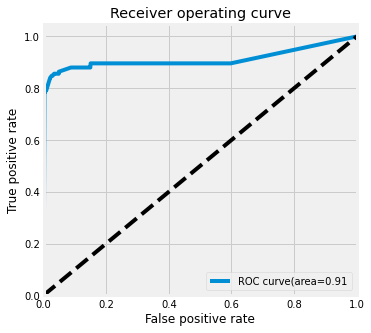

In [388]:
y_test_pred_prob=dt.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [389]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['Decision Tree (Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Test,0.91,0.08


In [390]:
dt_results=train_results.append(test_results)
dt_results

,Model,auc_roc_score,F1_score
0,Decision Tree (Balanced Dataset) Train,0.99,0.98
0,Decision Tree (Balanced Dataset) Test,0.91,0.08


In [391]:
balanced_results=balanced_results.append(dt_results)
balanced_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.97,0.89
0,Logistic Regression(Balanced Dataset) Test,0.98,0.04
0,Decision Tree (Balanced Dataset) Train,0.99,0.98
0,Decision Tree (Balanced Dataset) Test,0.91,0.08


## Random Forest with ADASYN

In [392]:
from sklearn.ensemble import RandomForestClassifier
cv = KFold(3, shuffle=True)
params={'max_depth': [10],
            'min_samples_leaf': [50,100],
            'min_samples_split': [25,50],'n_estimators':[200]}

rf=RandomForestClassifier()
model_rf=GridSearchCV(estimator=rf,param_grid=params,scoring='roc_auc',cv=cv,n_jobs=-1,verbose=1)
model_rf.fit(X_train_adasyn,y_train_adasyn)
print('The roc_auc score is',model_rf.best_score_)
print('The best parameter is',model_rf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The roc_auc score is 0.9994552363970842
The best parameter is {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 200}


In [393]:

rf=RandomForestClassifier(random_state=100,max_depth= 10, min_samples_leaf= 50, min_samples_split= 25,n_estimators= 200)
rf.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=25,
                       n_estimators=200, random_state=100)

In [394]:
y_train_pred=rf.predict(X_train_adasyn)
model_metrics(y_train_adasyn,y_train_pred)

F1 score:99.05
Classificaton report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    213238
           1       0.99      0.99      0.99    213193

    accuracy                           0.99    426431
   macro avg       0.99      0.99      0.99    426431
weighted avg       0.99      0.99      0.99    426431



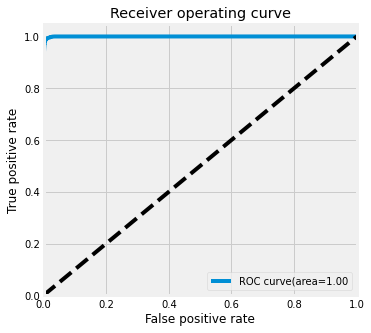

In [395]:
y_train_pred_prob=rf.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn,y_train_pred_prob)

In [396]:
auc_score=round(metrics.roc_auc_score(y_train_adasyn,y_train_pred_prob),2)
F1_score=round(f1_score(y_train_adasyn,y_train_pred),2)
train_results=pd.DataFrame({'Model':['Random Forest (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Train,1.0,0.99


- Test Data Set

In [397]:
y_test_pred=rf.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:19.29
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71077
           1       0.11      0.86      0.19       125

    accuracy                           0.99     71202
   macro avg       0.55      0.93      0.59     71202
weighted avg       1.00      0.99      0.99     71202



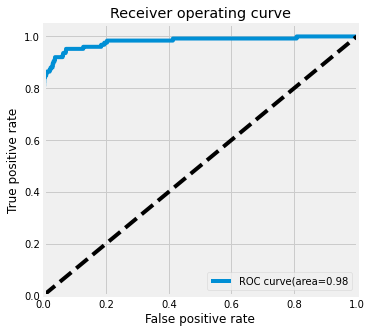

In [398]:
y_test_pred_prob=rf.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [399]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
rf_results=pd.DataFrame({'Model':['Random Forest (Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
rf_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Test,0.98,0.19


In [400]:
rf_results=train_results.append(rf_results)
rf_results

,Model,auc_roc_score,F1_score
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.19


In [401]:
balanced_results=balanced_results.append(rf_results)
balanced_results 

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.97,0.89
0,Logistic Regression(Balanced Dataset) Test,0.98,0.04
0,Decision Tree (Balanced Dataset) Train,0.99,0.98
0,Decision Tree (Balanced Dataset) Test,0.91,0.08
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.19


## XGBoost with ADASYN

In [403]:
from xgboost import XGBClassifier
params = {'min_child_weight': [11], 
              'max_depth': [6, 7],
              'learning_rate': [0.1, 0.3]}
XG_boost=XGBClassifier(n_estimators=200,eval_metric='logloss',use_label_encoder=False)
model_cv=GridSearchCV(estimator=XG_boost,
                      param_grid=params,scoring='roc_auc', cv=folds,
                      n_jobs=-1,verbose=1,return_train_score=True)
model_cv.fit(X_train_adasyn,y_train_adasyn)
print('The roc_auc score is',model_cv.best_score_)
print('The best parameter is',model_cv.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The roc_auc score is 0.9973950810354615
The best parameter is {'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 11}


In [404]:
#taking the best parameters
xg_boost=XGBClassifier(learning_rate=0.3,min_child_weight=11,max_depth=6)
xg_boost.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(learning_rate=0.3, max_depth=6, min_child_weight=11)

In [405]:
#prediction on train set.
y_train_pred=xg_boost.predict(X_train_adasyn)
model_metrics(y_train_adasyn,y_train_adasyn)

F1 score:100.0
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       1.00      1.00      1.00    213193

    accuracy                           1.00    426431
   macro avg       1.00      1.00      1.00    426431
weighted avg       1.00      1.00      1.00    426431



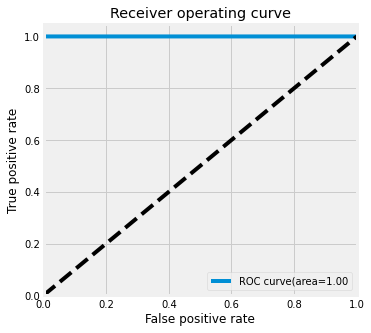

In [406]:
y_train_pred_prob=xg_boost.predict_proba(X_train_adasyn)[:,1]

draw_roc(y_train_adasyn,y_train_pred_prob)

In [407]:
#tabulating results in a data frame.
auc_score=round(metrics.roc_auc_score(y_train_adasyn,y_train_pred_prob),2)
F1_score=round(f1_score(y_train_adasyn,y_train_pred),2)
train_results=pd.DataFrame({'Model':['XG Boost (Balanced Dataset) Train'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
train_results

,Model,auc_roc_score,F1_score
0,XG Boost (Balanced Dataset) Train,1.0,1.0


- Test Data Set

In [408]:
y_test_pred=xg_boost.predict(X_test)
model_metrics(y_test,y_test_pred)

F1 score:74.91
Classificaton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.67      0.85      0.75       125

    accuracy                           1.00     71202
   macro avg       0.84      0.92      0.87     71202
weighted avg       1.00      1.00      1.00     71202



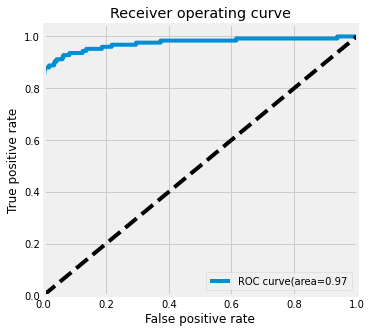

In [409]:
y_test_pred_prob=xg_boost.predict_proba(X_test)[:,1]
draw_roc(y_test,y_test_pred_prob)

In [410]:
auc_score=round(metrics.roc_auc_score(y_test,y_test_pred_prob),2)
F1_score=round(f1_score(y_test,y_test_pred),2)
test_results=pd.DataFrame({'Model':['XG Boost(Balanced Dataset) Test'],'auc_roc_score':[auc_score],'F1_score':[F1_score]},index=None)
test_results

,Model,auc_roc_score,F1_score
0,XG Boost(Balanced Dataset) Test,0.97,0.75


In [411]:
xg_boost_results=train_results.append(test_results)
xg_boost_results

,Model,auc_roc_score,F1_score
0,XG Boost (Balanced Dataset) Train,1.00,1.00
0,XG Boost(Balanced Dataset) Test,0.97,0.75


In [412]:
adasyn_results=balanced_results.append(xg_boost_results)
adasyn_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.97,0.89
0,Logistic Regression(Balanced Dataset) Test,0.98,0.04
0,Decision Tree (Balanced Dataset) Train,0.99,0.98
0,Decision Tree (Balanced Dataset) Test,0.91,0.08
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.19
0,XG Boost (Balanced Dataset) Train,1.00,1.00
0,XG Boost(Balanced Dataset) Test,0.97,0.75


Top var = 14
2nd Top var = 4
3rd Top var = 8


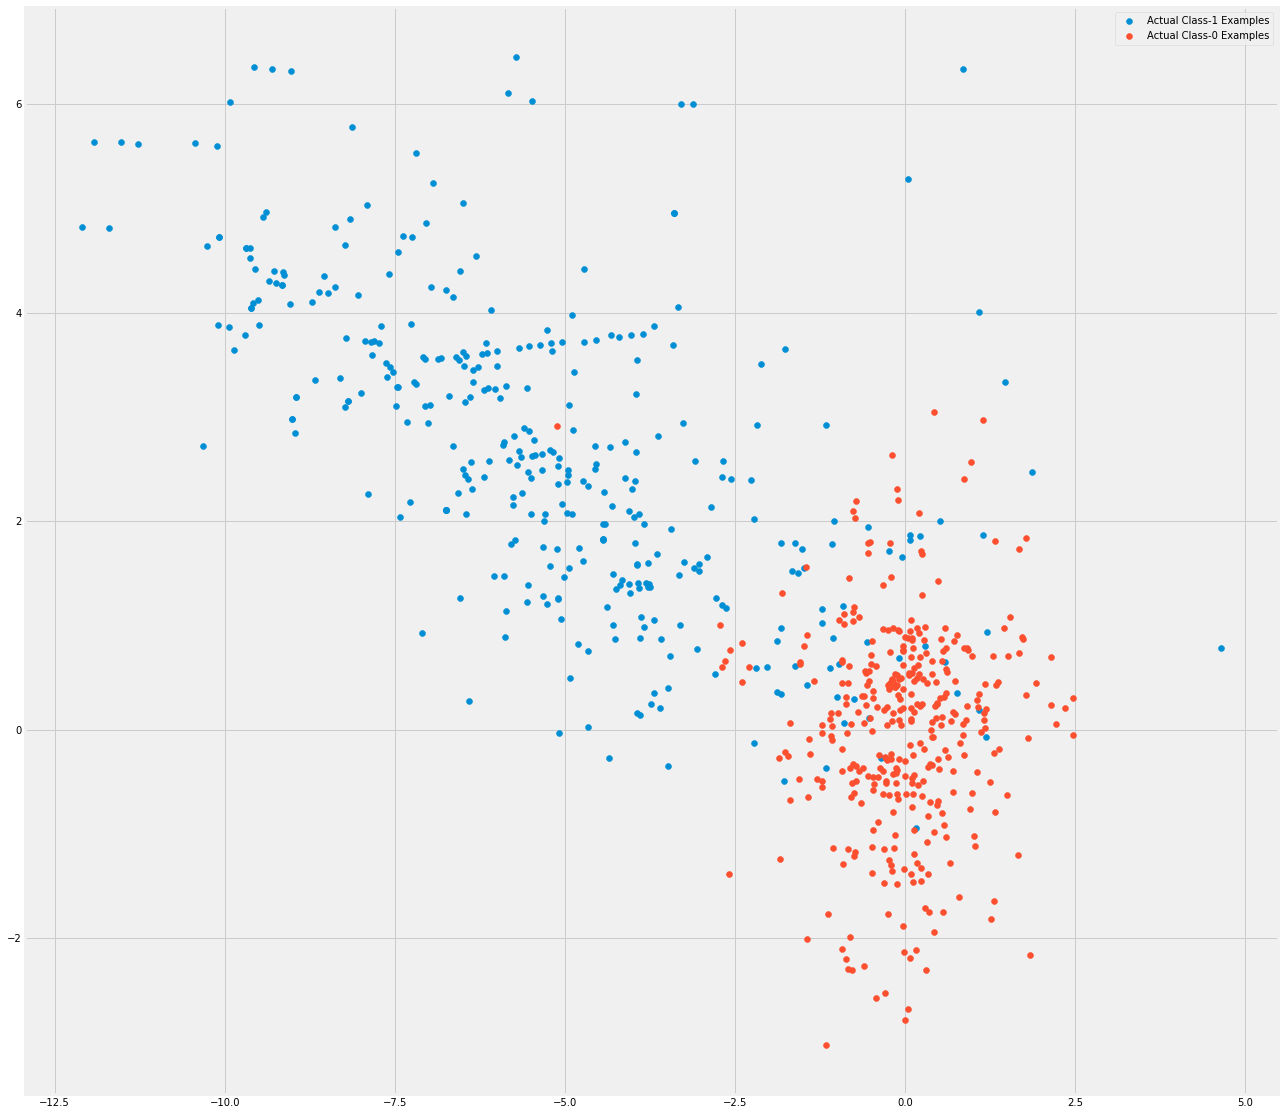

In [413]:
var_imp = []
for i in xg_boost.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xg_boost.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xg_boost.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xg_boost.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xg_boost.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xg_boost.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [414]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [415]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn,y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn,y_train_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999998757392321
0.91380876


## Imblanced Model Results

In [369]:
final_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Imbalanced Dataset) Test,0.98,0.72
0,Logistic Regression(Imbalanced Dataset) Train,0.98,0.70
0,Decision Tree (Imbalanced Dataset) Train,0.98,0.72
0,Decision Tree (Imbalanced Dataset) Test,0.94,0.69
0,Random Forest (Imbalanced Dataset) Train,1.00,0.76
0,Random Forest (Imbalanced Dataset) Test,0.97,0.76
0,XG Boost (Imbalanced Dataset) Train,1.00,0.94
0,XG Boost(Imbalanced Dataset) Test,0.98,0.86


- Almost all the models here perform well. But we cannot take this into consideratiion is the data is imbalanced.

## Balanced Model Results with OverSampling.

In [370]:
balanced_results_over

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.11
0,Decision Tree (Balanced Dataset) Train,1.00,0.99
0,Decision Tree (Balanced Dataset) Test,0.90,0.34
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.75
0,XG Boost (Balanced Dataset) Train,1.00,1.00
0,XG Boost(Balanced Dataset) Test,0.98,0.86


- All models perform well here except LogReg.

## Balanced Model Results with SMOTE.

In [371]:
smote_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.99,0.95
0,Logistic Regression(Balanced Dataset) Test,0.98,0.10
0,Decision Tree (Balanced Dataset) Train,1.00,0.99
0,Decision Tree (Balanced Dataset) Test,0.90,0.18
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.57
0,XG Boost (Balanced Dataset) Train,1.00,1.00
0,XG Boost(Balanced Dataset) Test,0.97,0.58


- For SMOTE, Random Forest and XG Boost perfrom well.

## Balanced Model Results with ADASYN.

In [416]:
adasyn_results

,Model,auc_roc_score,F1_score
0,Logistic Regression(Balanced Dataset) Train,0.97,0.89
0,Logistic Regression(Balanced Dataset) Test,0.98,0.04
0,Decision Tree (Balanced Dataset) Train,0.99,0.98
0,Decision Tree (Balanced Dataset) Test,0.91,0.08
0,Random Forest (Balanced Dataset) Train,1.00,0.99
0,Random Forest (Balanced Dataset) Test,0.98,0.19
0,XG Boost (Balanced Dataset) Train,1.00,1.00
0,XG Boost(Balanced Dataset) Test,0.97,0.75


- Only XG_Boost performs well when it comes to ADASYN 

## Conclusion

- For banks with very low transaction value, we would need a model with high precision.
- So we need to select a model with highest precision, good roc_auc and F1 score.
- XG Boost model with oversampling caters to the above need. Hence we choose XGboos with Oversampling as the model to go for this scenario.

In [7]:
import pandas as pd
best_model=pd.DataFrame({'Model':'XG_boost with Oversampling','Precision':['0.88'],'Recall':['0.84'],'auc_roc':['0.98'],'F1_score':['0.86']})
best_model

,Model,Precision,Recall,auc_roc,F1_score
0,XG_boost with Oversampling,0.88,0.84,0.98,0.86


- For banks with high transaction value, we would need a model with high recall.
- So we need to select a model with highest recall, good roc_auc and F1 score.
- XG Boost model with ADASYN caters to the above need. Hence we choose XGboost with Oversampling as the model to go for this scenario.

In [8]:
best_model=pd.DataFrame({'Model':'XG_boost with ADASYN','Precision':['0.67'],'Recall':['0.85'],'auc_roc':['0.97'],'F1_score':['0.75']})
best_model

,Model,Precision,Recall,auc_roc,F1_score
0,XG_boost with ADASYN,0.67,0.85,0.97,0.75
